# Lab 0.7 - Manipulating Datasets with Pandas

## Objective
- Install and learn the basics of the `pandas` library.
- Manipulate and analyze datasets, finding basic statistics and adding/removing columns.
- Create data visualizations using `matplotlib`.

## Rubric
- 6 pts - Contains all required components and uses professional language and commenting
- 5 pts - Contains all required components, but uses unprofessional language, commenting, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

# Instructions

Fill in the following code boxes. **Answer the numbered questions in comments next to the code you used to find the answer**.

# Problem 1: Weather Data

We are going to analyze the dataset you created. Use `import pandas as pd` to import the `pandas` library. Then use `df = pd.read_csv("filename.csv")` to create a `DataFrame` called `df`. 

In [36]:
import pandas as pd

# getting the csv into a pandas usable format
df = pd.read_csv("weather.csv")

### `pandas` method reference

- `df.head(x)` and `df.tail(x)` will give you the first or the last `x` number of rows respectively
- `df.describe()` will give you a **five number summary** of the numeric columns
- `df.max()` and `.min()` will with you the maximum and the minimum of the column repectively
- `df[column]` will give you the column specified
- `df.iloc[index]` will give you the row at a given index
- `df.boxplot` will create a box plot of all numeric columns
- `df.sort_values(by=col, ascending=False)`sorts the values of the col in either ascending or descending order


1. What is the last entry in your table?

In [37]:
# printing the last "1" elements
print(df.tail(1))

           datetime  temp_c  temp_f humidity
784  02/04/25 20:18    21.8    71.2    27.5%


2. What is the average temperature(either outside or inside) over your 40 hour period. What is the lowest temperature? What is the highest temperature? 

In [38]:
# iterating through the collum and grabbing the total
total = 0
temps = df["temp_c"]
for temp in temps:
    total += temp

# dividing the total degrees by the amount of data points to get the average degree for each data point
print(f"The average temperature is {round(total/len(temps), 2)}℃")

The average temperature is 20.52℃


3. Create a boxplot of the temperatures.

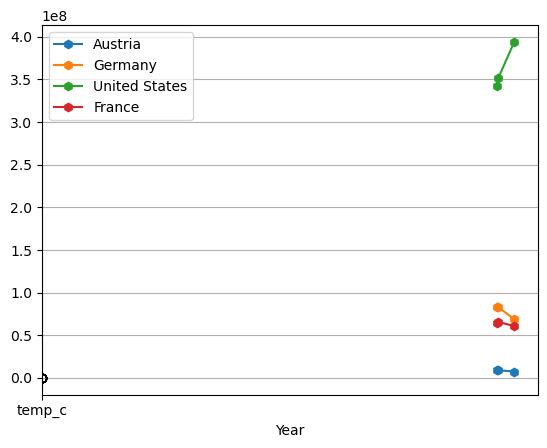

In [39]:
import matplotlib.pyplot as plt

# creates a picture object that plt.show() finds and displays
df[["temp_c"]].boxplot()
plt.show()

4. Create a plot of temperature over time with `matplotlib`. 

Import the library with `import matplotlib.pyplot as plt`. The `plot()` method creates a line graphs of temperature over time. Use `plt.plot(df['x_col'],df['y_col'],marker='h')` then `plt.show()` to create your plot of temperature over time. 

Before `plt.show()`, add the following methods to modify your graph. Remember, **good graphs always have axis labels, a title, clear units etc.**

```
plt.xlabel('') # labels the x-axis
plt.ylabel('') # labels the y-axis
plt.title('') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
```

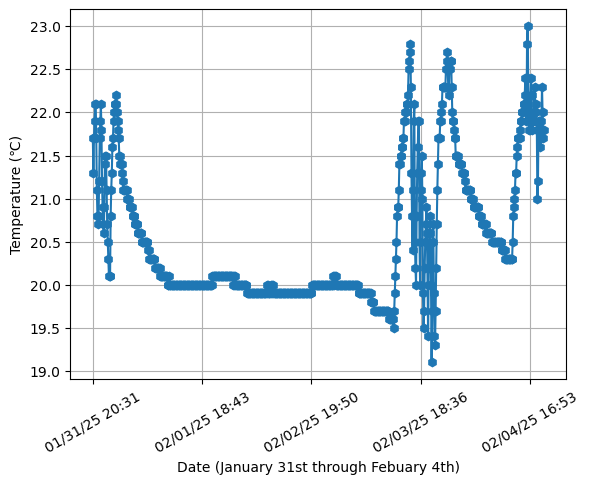

In [40]:
import numpy as np

# making the plot with the x axis as time and y axis as celsius degrees
plt.plot(df["datetime"], df["temp_c"], marker="h")

# setting the amount of tickmarks on the x axis by creating an array with arange(start, stop, step)
plt.xticks(np.arange(0, 900, 190))

# rotating the ticks
plt.xticks(rotation=30)

# labeling setting the grid and displaying
plt.xlabel("Date (January 31st through Febuary 4th)")
plt.ylabel("Temperature (℃)")
plt.grid()
plt.show()

5. Define a new column called `kelvin` which is your `celsius` column + 273.15. 

In [41]:
# setting a new collum equal to the kelvin temp
df["temp_k"] = df["temp_c"] + 273.15
print(df["temp_k"])

0      294.85
1      294.45
2      294.85
3      295.05
4      295.25
        ...  
780    295.05
781    295.45
782    295.15
783    294.85
784    294.95
Name: temp_k, Length: 785, dtype: float64


6. Get the record(row) at 2:30PM 


In [42]:
# turning the datetime collum into datetime format just in case
df["datetime"] = pd.to_datetime(df["datetime"])


# finding all the data between 14:00 and 15:00 on Febuary the 3rd
print(df[(df["datetime"] > "02/03/25 14:00") & (df["datetime"] < "02/03/25 15:00")])

               datetime  temp_c  temp_f humidity  temp_k
531 2025-02-03 14:01:00    20.9    69.6    25.0%  294.05
532 2025-02-03 14:11:00    21.1    70.0    24.7%  294.25
533 2025-02-03 14:26:00    21.4    70.5    24.7%  294.55
534 2025-02-03 14:31:00    21.4    70.5    24.7%  294.55
535 2025-02-03 14:36:00    21.5    70.7    24.8%  294.65
536 2025-02-03 14:46:00    21.5    70.7    24.7%  294.65
537 2025-02-03 14:51:00    21.6    70.9    24.7%  294.75
538 2025-02-03 14:56:00    21.6    70.9    24.6%  294.75


/tmp/ipykernel_20918/1846482106.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["datetime"] = pd.to_datetime(df["datetime"])


# Problem 2: Population Data

In this example we will fetch data about countries and their predicted populations from [Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population).

I have done the web scraping and creation of a `DataFrame`,`df_a`.

In [43]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

tbody = soup.find_all("tbody")
tr = tbody[0].find_all("tr")

arr = []
mat = []
for t in tr:
    lst = t.text.split("\n")
    for l in lst:
        if l == "":
            if arr != []:
                arr = arr[0:2] + arr[2::2]
                mat.append(arr)
                arr = []
        else:
            try: 
                arr.append(int(l.lstrip('\xa0').replace(",","")))
            except ValueError:
                arr.append(str(l.lstrip('\xa0').replace(",","")))
titles = mat[0]
titles[0] = "countries"
mat = mat[1:]
df_a = pd.DataFrame.from_records(mat, columns=titles) 


1. A 5 number summary of `df_a`

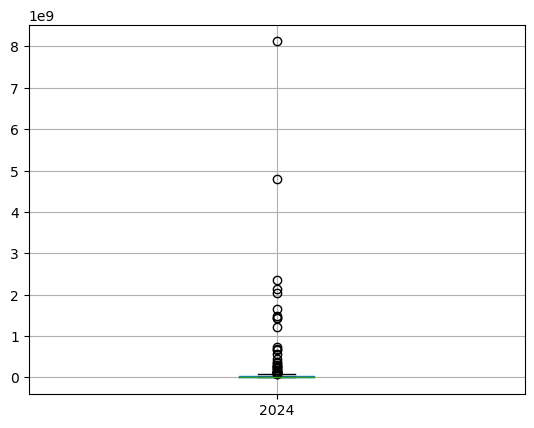

In [44]:
df_a[[2024]].boxplot()
plt.show()

2. How is the `DataFrame` currently indexed? If it is not already, make the `countries` column the index.

In [45]:
df_a.set_index("countries", inplace=True)
display(df_a)

,2024,2030,2100
countries,,,
World,8118836000,8546141000,22901278109
Asia,4785060000,4958807000,12902801109
Africa,1494994000,1710666000,3924421000
Sub-Saharan Africa,1226534000,1417346000,3442347000
Central Asia and South Asia,2128585000,2258687000,2559659000
...,...,...,...
Venezuela,29395334,32027461,35353213
Vietnam,99497680,102699905,91036732
Yemen,35219853,39923245,74176034


3. What is the largest population listed for 2030?

In [46]:
highest = 0
for population in df_a[2030]:
    if population > highest:
        highest = population

print(highest)

8546141000


4. What was the population of Austria from now to 2100?

In [47]:
row = df_a.loc["United States"]
print("Population in 2024: ", row[2024], "\n", "Population in 2100: ", row[2100], sep="")

Population in 2024: 341814420
Population in 2100: 394041155


5. What will the population be of France in 2030?

In [48]:
print(f"The population of France in 2030: {df_a.loc["France"][2030]}")

The population of France in 2030: 65543452


6. What 5 entries will have the highest population in 2100? Display their records.

In [49]:
print(df_a[2100].sort_values(ascending=False).head(5))


countries
World                          22901278109
Asia                           12902801109
Africa                          3924421000
Sub-Saharan Africa              3442347000
Central Asia and South Asia     2559659000
Name: 2100, dtype: int64


7. What was country with the smallest population in 2024?

In [50]:
print(df_a[2024].sort_values(ascending=False).tail(1))


countries
Vatican City    526
Name: 2024, dtype: int64


8. Create a plot with `plot()` to compare the population of Austria, Germany, United States, and France from 2024-2100. Your graph needs to include a  proper title, axis labels, and legend.

2024    64881830
2030    65543452
2100    60851673
Name: France, dtype: int64


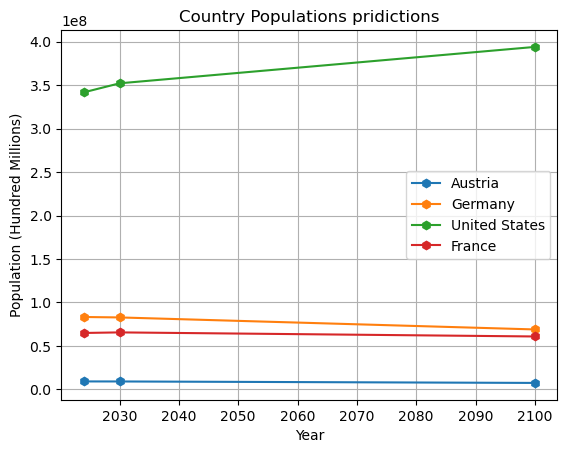

In [ ]:
print(df_a.loc["France"])
plt.plot(df_a.loc["Austria"], marker="h")
plt.plot(df_a.loc["Germany"], marker="h")
plt.plot(df_a.loc["United States"], marker="h")
plt.plot(df_a.loc["France"], marker="h")
plt.legend(["Austria", "Germany", "United States", "France"])
plt.xlabel("Year")
plt.title("Country Population predictions")
plt.grid()
plt.ylabel("Population (Hundred Millions)")
plt.show()